# HW10 - Classes

## Exercise 1

Create a class that describes something.

I programmed a deck of cards and some simple operations connected with it. First, I prepared a `Card` which describes single cards. hen I wrote a class for a deck of cards (`CardDeck`), which can hold a list of `Card` instances. The class `Card` only contain the cards' suit and rank, the `CardDeck` class contains:
* a list to store the cards in the deck
* a list to store the cards that were drawn from the deck, in the order they were drawn
* a method `create_deck` to create a regular 52 card deck, that is called when the CardDeck is initialized
* a method `shuffle` to shuffle the list of cards of the deck
* a method `get_number_of_cards_remaining` to retrieve the number of cards remaining in the deck
* a method `get_value_of_cards_remaining` to retrieve the total value of all cards remaining in the deck
* a method `get_cards_drawn` to retrieve the drawn cards
* a method `draw` to draw the topmost card from the deck (this function has to remove the drawn card from the deck)
* a method `peek` to peek the next three cards that will be drawn from the deck 
 

In [1]:
import random

suits = ['hearts', 'diamonds', 'clubs', 'spades']
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'jack', 'queen', 'king', 'ace']
rank_value = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7,
              '8': 8, '9': 9, '10': 10, 'jack': 10, 'queen': 10, 'king': 10, 'ace': 11}


class Card:
    def __init__(self, suit=None, rank=None):
        # assert suit in suits
        self.suit = suit
        # assert rank in ranks
        self.rank = rank

    def __str__(self):
        """
        Dunder method to return a human-readable string, e.g. in the print function
        @return: None
        """
        return f'{self.rank} of {self.suit}'


class CardDeck:
    def __init__(self):
        # Stored cards
        self.deck_stored = []
        # Drawn cards
        self.deck_drawn = []
        # Deck (list of all cards) is initialized when the class the instance is created
        self.create_deck()

    def create_deck(self):
        """
        Creates a regular 52 card deck when CardDeck is initialized
        stores it in self.deck_stored
        @return: None
        """
        for s in suits:
            for r in ranks:
                self.deck_stored.append(Card(suit=s, rank=r))
        return

    def shuffle(self):
        """
        Shuffles the card in self.deck_stored
        @return: None
        """
        random.shuffle(self.deck_stored)
        return

    def get_number_of_cards_remaining(self):
        """
        Retrieves the number of cards remaining in the deck
        @return: int, length of self.deck_stored
        """
        return len(self.deck_stored)

    def get_value_of_cards_remaining(self):
        """
        Retrieves the total value of all cards remaining in the deck
        @return: int, total value of all cards
        """
        return sum([rank_value[card.rank] for card in self.deck_stored])

    def get_cards_drawn(self):
        """
        Retrieves the drawn cards
        @return: list, list of drawn cards
        """
        return [card for card in self.deck_drawn]

    def draw(self):
        """
        Draws the topmost card from the deck
        Prints its suit and rank
        @return: None
        """
        # The topmost card is the last one in the stored cards
        card = self.deck_stored.pop()
        self.deck_drawn.append(card)
        return card

    def peek(self):
        """
        Lets to peek at the next three cards that will be drawn from the deck
        @return: list, list of next three cards
        """
        return [card for card in self.deck_stored[:-4:-1]]

Let's check how our class works:

In [2]:
random.seed(42)
# Creates an instance of the card deck
deck = CardDeck()
# Prints the amount of cards available
print('Number of cards in the deck:', deck.get_number_of_cards_remaining())
# Check if the bookkeeping of the drawn cards is done properly
print('Combined value of the cards', deck.get_value_of_cards_remaining())
# Draws three cards and prints them
deck.shuffle()
for i in range(3):
    card = deck.draw()
    print(card)
# Check if we're missing any cards
print('Number of cards in the deck after three were drawn:', deck.get_number_of_cards_remaining())
print('Combined value of remaining cards', deck.get_value_of_cards_remaining())

# Peeks at the next three cards
next_3_cards = deck.peek()
print(10 * '#' + ' These cards are the next to be drawn: ' + 10 * '#')
for card in next_3_cards:
    print(card)
# Checks if that's true
print(10 * '#' + ' These cards were drawn ' + 10 * '#')
# Draws next three cards and prints them
for i in range(3):
    card = deck.draw()
    print(card)
print('Number of cards in the deck after six were drawn:', deck.get_number_of_cards_remaining())
# Checks the drawn cards
drawncards = deck.get_cards_drawn()
for card in drawncards:
    print(card)
# Check if the bookkeeping of the drawn cards is done properly
print('Combined value of remaining cards', deck.get_value_of_cards_remaining())

Number of cards in the deck: 52
Combined value of the cards 380
3 of spades
9 of hearts
3 of hearts
Number of cards in the deck after three were drawn: 49
Combined value of remaining cards 365
########## These cards are the next to be drawn: ##########
10 of spades
6 of diamonds
4 of diamonds
########## These cards were drawn ##########
10 of spades
6 of diamonds
4 of diamonds
Number of cards in the deck after six were drawn: 46
3 of spades
9 of hearts
3 of hearts
10 of spades
6 of diamonds
4 of diamonds
Combined value of remaining cards 345


## Exercise 2

Write a class that describes RNA sequences. We need:

* Constructor that takes the RNA sequene and creates an object with it
* Method `translation` - translates the RNA sequence according to the standard genetic code table
* Method `back transcription` - reverse transcribes the RNA sequence

In [3]:
from Bio.Seq import Seq


class RNA:
    def __init__(self, rna_seq):
        self.rna_seq = Seq(rna_seq)

    def translation(self):
        """
        Translates the RNA sequence
        @return: Bio.Seq.Seq object, protein sequence
        """
        return self.rna_seq.translate()

    def back_transcription(self):
        """
        Back transcribes the RNA sequence
        @return: Bio.Seq.Seq object, dna sequence
        """
        return self.rna_seq.back_transcribe()

In [4]:
rna_seq = RNA("AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG")
protein_seq = rna_seq.translation()
dna_seq = rna_seq.back_transcription()
print(protein_seq)
print(dna_seq)

MAIVMGR*KGAR*
ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG


## Exercise 3:

Write a class that is inhereted from set and which will only contain positive numbers (>0) when created and won't allow adding any negative numbers (I assumed, also nothing that is not a float/int).

In [5]:
class PositiveSet(set):
    def __init__(self, collection):
        self.data = [element for element in collection if isinstance(element, (int, float)) and element > 0]
        super(PositiveSet, self).__init__(self.data)

    def add(self, element):
        """
        Add a positive element to a set.
        @param element: object
        @return: None
        """
        if isinstance(element, (int, float)) and element > 0:
            super(PositiveSet, self).add(element)
        return

    def update(self, collection):
        """
        Update the set with a collection of positive numbers
        @param collection: list/tuple/set
        @return: None
        """
        for element in collection:
            self.add(element)
        return

    def __ior__(self, other):
        """
        In place union operator - set1 |= set2
        @param other: set
        @return: self, updated set
        """
        self.update(other)
        return self

    def __or__(self, other):
        """
        In place union operator - set1 = set1 | set2
        @param other: set
        @return: self, updated set
        """
        self.update(other)
        return self

In [6]:
a = PositiveSet([1, 2, 3, 4, -100])
b = [-1, -2, -5, 6, 10, -20, 50]
a.add(-1)
print(a)
a.update(b)
print(a)
c = {5, 6, 7, -1, -14}
a |= c
print(a)
a = a | c
print(a)

PositiveSet({1, 2, 3, 4})
PositiveSet({1, 2, 3, 4, 6, 10, 50})
PositiveSet({1, 2, 3, 4, 5, 6, 7, 10, 50})
PositiveSet({1, 2, 3, 4, 5, 6, 7, 10, 50})


## Exercise 4

Создайте класс для сбора статистик по фастам.
Входные параметры:
Путь к фаста файлу
Методы:
Подсчёт числа последовательностей в фаста файле
Построение гистограммы длин последовательностей
Подсчёт GC состава
Построение гистограммы частоты 4-меров (по оси x каждый из возможных 4-меров, а по y - их частота)
Переопределение метода для вывода информации при принте (достаточно текста с указанием путя к файлу)
Выполнение всех реализованных методов по подсчёту метрик
Можно придумать дополнительные метрики и реализовать их (по 1 баллу за каждую)

Create a class for statistic analysis of FASTA files.

Input parameters:

* Path to the FASTA file

Methods:
* `__init__` - initiate the class with all the attributes
* `__str__` - redefine method for information generation when printing
* `check_type` - checks the molecule type (DNA, RNA, protein)
* `count_seq` - number of sequences in FASTA file
* `hist_len_distribution` - build a histogram for length distribution of the sequences
* `min_max_seq_len` - returns minimal and maximal sequence length
* `gc_calc` - GC content
* `n_calc` - N content
* `count_kmers` - histogram of 4-mers (x-axis - all possible 4-mers, y-axis - their frequency
* `statistics` - run the whole statistical analysis

Addition:
* `check_if_None` - decorator, checks if some attributes are already calculated to save the computational resources

In [7]:
from pathlib import Path
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from Bio.SeqUtils import GC
import itertools

In [8]:
def check_if_None(attribute):
    """
    Checks whether the attribute is already calculated and returns it directly if it is, calculates it in case it is not
    @param attribute: attribute of the class
    @return: attribute
    """

    def decorator_None(func):
        def wrapper_None(self, *args):
            if getattr(self, attribute) is None:
                func(self)
                return getattr(self, attribute)
            else:
                return getattr(self, attribute)

        return wrapper_None

    return decorator_None

In [9]:
class FASTAStats:
    """
    Class for generating statistics about FASTA files
    """

    def __init__(self, path_to_file, save_files=True, output_dir="./"):
        # Path to file
        self.path_to_file = path_to_file
        # Type of the molecule determined after check_type
        self.type = None
        # Total number of sequences, determined after self.count_seq()
        self.num_seq = None
        # Minimal sequence length, determined after self.hist_len_distribution()
        self.min_seq_len = None
        # Maximal sequence length, determined after self.hist_len_distribution()
        self.max_seq_len = None
        # GC content, determined after self.gc_calc()
        self.gc_content = None
        # N (unknown nucleotide) content, determined after self.n_calc()
        self.n_content = None
        # Saves files or not
        self.save_files = save_files
        # Output directory
        self.output_dir = output_dir

    def __str__(self):
        """
        Dunder method to return a human-readable string, e.g. in the print function
        @return: str
        """
        return f"Path to the file: {self.path_to_file}"

    @check_if_None("type")
    def check_type(self):
        """
        Returns the molecule type in the FASTA file: DNA, RNA or protein
        It is assumed, that in unresolved cases (e.g. when no thymine/uracil is present in the nucleotide sequences)
        it is directly classified as DNA.
        @return: self.type - str, denoting the type
        """
        dna_type = {"A", "C", "G", "T", "N"}
        rna_type = {"A", "C", "G", "U", "N"}
        set_unique_elements = set()
        with open(self.path_to_file) as f:
            for nuc_seq in SeqIO.parse(f, "fasta"):
                set_unique_elements.update([element.upper() for element in nuc_seq.seq])
        if set_unique_elements.issubset(dna_type):
            self.type = "DNA"
        elif set_unique_elements.issubset(rna_type):
            self.type = "RNA"
        else:
            self.type = "protein"
        return self.type

    @check_if_None("num_seq")
    def count_seq(self):
        """
        Count the total number of sequences in the FASTA file
        @return: self.num_seq - int
        """
        self.num_seq = 0
        with open(self.path_to_file) as f:
            for nuc_seq in SeqIO.parse(f, "fasta"):
                self.num_seq += 1
        return self.num_seq

    def hist_len_distribution(self, stat="count"):
        """
        Builds a histogram for length distribution of the sequences in the FASTA file
        @param stat: str, "count", "frequency", "probability", "percent" - default "count"
        @return: None,
                 Histogram is saved as .jpg file, if self.save_files = True,
                 and shown directly if self.save_files = False
        """
        seq_len = []
        with open(self.path_to_file) as f:
            for nuc_seq in SeqIO.parse(f, "fasta"):
                seq_len.append(len(nuc_seq.seq))

        self.max_seq_len = max(seq_len)
        self.min_seq_len = min(seq_len)
        plt.figure(figsize=(30, 20), dpi=100)
        sns.set(style='whitegrid')
        sns.histplot(seq_len, stat=stat, binwidth=(self.max_seq_len - self.min_seq_len) / 100,
                     color='purple')
        plt.xlabel("Length of the sequence [bp]")
        plt.suptitle("Histogram of sequence length distribution", y=0.95, x=0.51, fontsize=25)
        plt.title(f"for file {self.path_to_file}", fontsize=20)
        if self.save_files:
            plt.savefig(Path(self.output_dir, Path(self.path_to_file).stem + "_hist_len.jpg"))
            plt.close()
        else:
            plt.show()

    def min_max_seq_len(self):
        """
        Returns minimal and maximal sequence lengths in FASTA file
        @return: self.min_seq_len, self.max_seq_len - tuple of int
        """
        if isinstance(self.min_seq_len, type(None)):
            self.hist_len_distribution()
            return self.min_seq_len, self.max_seq_len
        else:
            return self.min_seq_len, self.max_seq_len

    @check_if_None("gc_content")
    def gc_calc(self):
        """
        Calculates the GC content as percent (makes sense for RNA and DNA sequences)
        @return: self.gc_content - float
        """
        gc_content_list = []
        with open(self.path_to_file) as f:
            for nuc_seq in SeqIO.parse(f, "fasta"):
                gc_content_list.append(GC(nuc_seq.seq))

        self.gc_content = np.round(np.mean(gc_content_list), 2)
        return self.gc_content

    @check_if_None("n_content")
    def n_calc(self):
        """
        Calculates the N content as percent (makes sense for RNA and DNA sequences)
        @return: self.n_content - float
        """
        n_content_list = []
        with open(self.path_to_file) as f:
            for nuc_seq in SeqIO.parse(f, "fasta"):
                n_content_list.append((nuc_seq.seq).count('N') / len(nuc_seq.seq))
        self.n_content = np.round(np.mean(n_content_list), 2)
        return self.n_content

    def count_kmers(self):
        """
        Builds a histogram of percents of 4-mers for RNA and DNA sequences
        @return: None,
                 Histogram is saved as .jpg file, if self.save_files = True,
                 and shown directly if self.save_files = False
        """
        pos_kmers = {}
        types = {"DNA": "ACGT", "RNA": "ACGU"}
        for kmer in itertools.product(types[self.type], types[self.type], repeat=2):
            pos_kmers["".join(kmer)] = 0

        with open(self.path_to_file) as f:
            for nuc_seq in SeqIO.parse(f, "fasta"):
                for i in range(len(nuc_seq.seq) - 3):
                    kmer = str(nuc_seq.seq[i:i + 4]).upper()
                    if "N" not in kmer:  # We don't take N into account, because the histogram gets too large
                        pos_kmers[kmer] += 1
        sns.reset_orig()
        plt.figure(figsize=(30, 20), dpi=100)
        values = np.array(list(pos_kmers.values()))
        sum_values = np.sum(values)
        per_values = values / sum_values * 100
        plt.bar(pos_kmers.keys(), per_values, align='center', color=plt.get_cmap("magma").colors)
        plt.xticks(rotation=90, fontsize=4)
        plt.suptitle("4-mer Distribution", y=0.95, x=0.51, fontsize=25)
        plt.title(f"for file {self.path_to_file}", fontsize=20)
        if self.save_files:
            plt.savefig(Path(self.output_dir, Path(self.path_to_file).stem + "_4mers.jpg"))
            plt.close()
        else:
            plt.show()

    def statistics(self):
        """
        Runs the whole statistical analysis for the FASTA file
        @return: self.type, self.num_seq, self.min_seq_len, self.max_seq_len, self.gc_content, self.n_content
                 - str, int, int, int, float, float
        """
        self.check_type()
        self.count_seq()
        self.hist_len_distribution()
        self.gc_calc()
        self.n_calc()
        self.count_kmers()

        if self.save_files:
            data = {
                "Type": self.type,
                "Count of the sequences": self.num_seq,
                "Minimal sequence length:": self.min_seq_len,
                "Maximal sequence length": self.max_seq_len,
                "GC content": self.gc_content,
                "N content": self.n_content
            }
            pd.DataFrame.from_dict(data, orient='index').to_csv(Path(self.output_dir,
                                                                     Path(self.path_to_file).stem + "_statistics.csv"),
                                                                header=False)
        else:
            print(self)
            print(f"Type of the file: {self.type}")
            print(f"Count of the sequences: {self.num_seq}")
            print(f"Minimal sequence length: {self.min_seq_len} and maximal: {self.max_seq_len}")
            print(f"GC content: {self.gc_content}")
            print(f"N content: {self.n_content}")

        return self.type, self.num_seq, self.min_seq_len, self.max_seq_len, self.gc_content, self.n_content


Path to the file: Daucus_carota.ASM162521v1.cdna.all.fa
DNA
32109


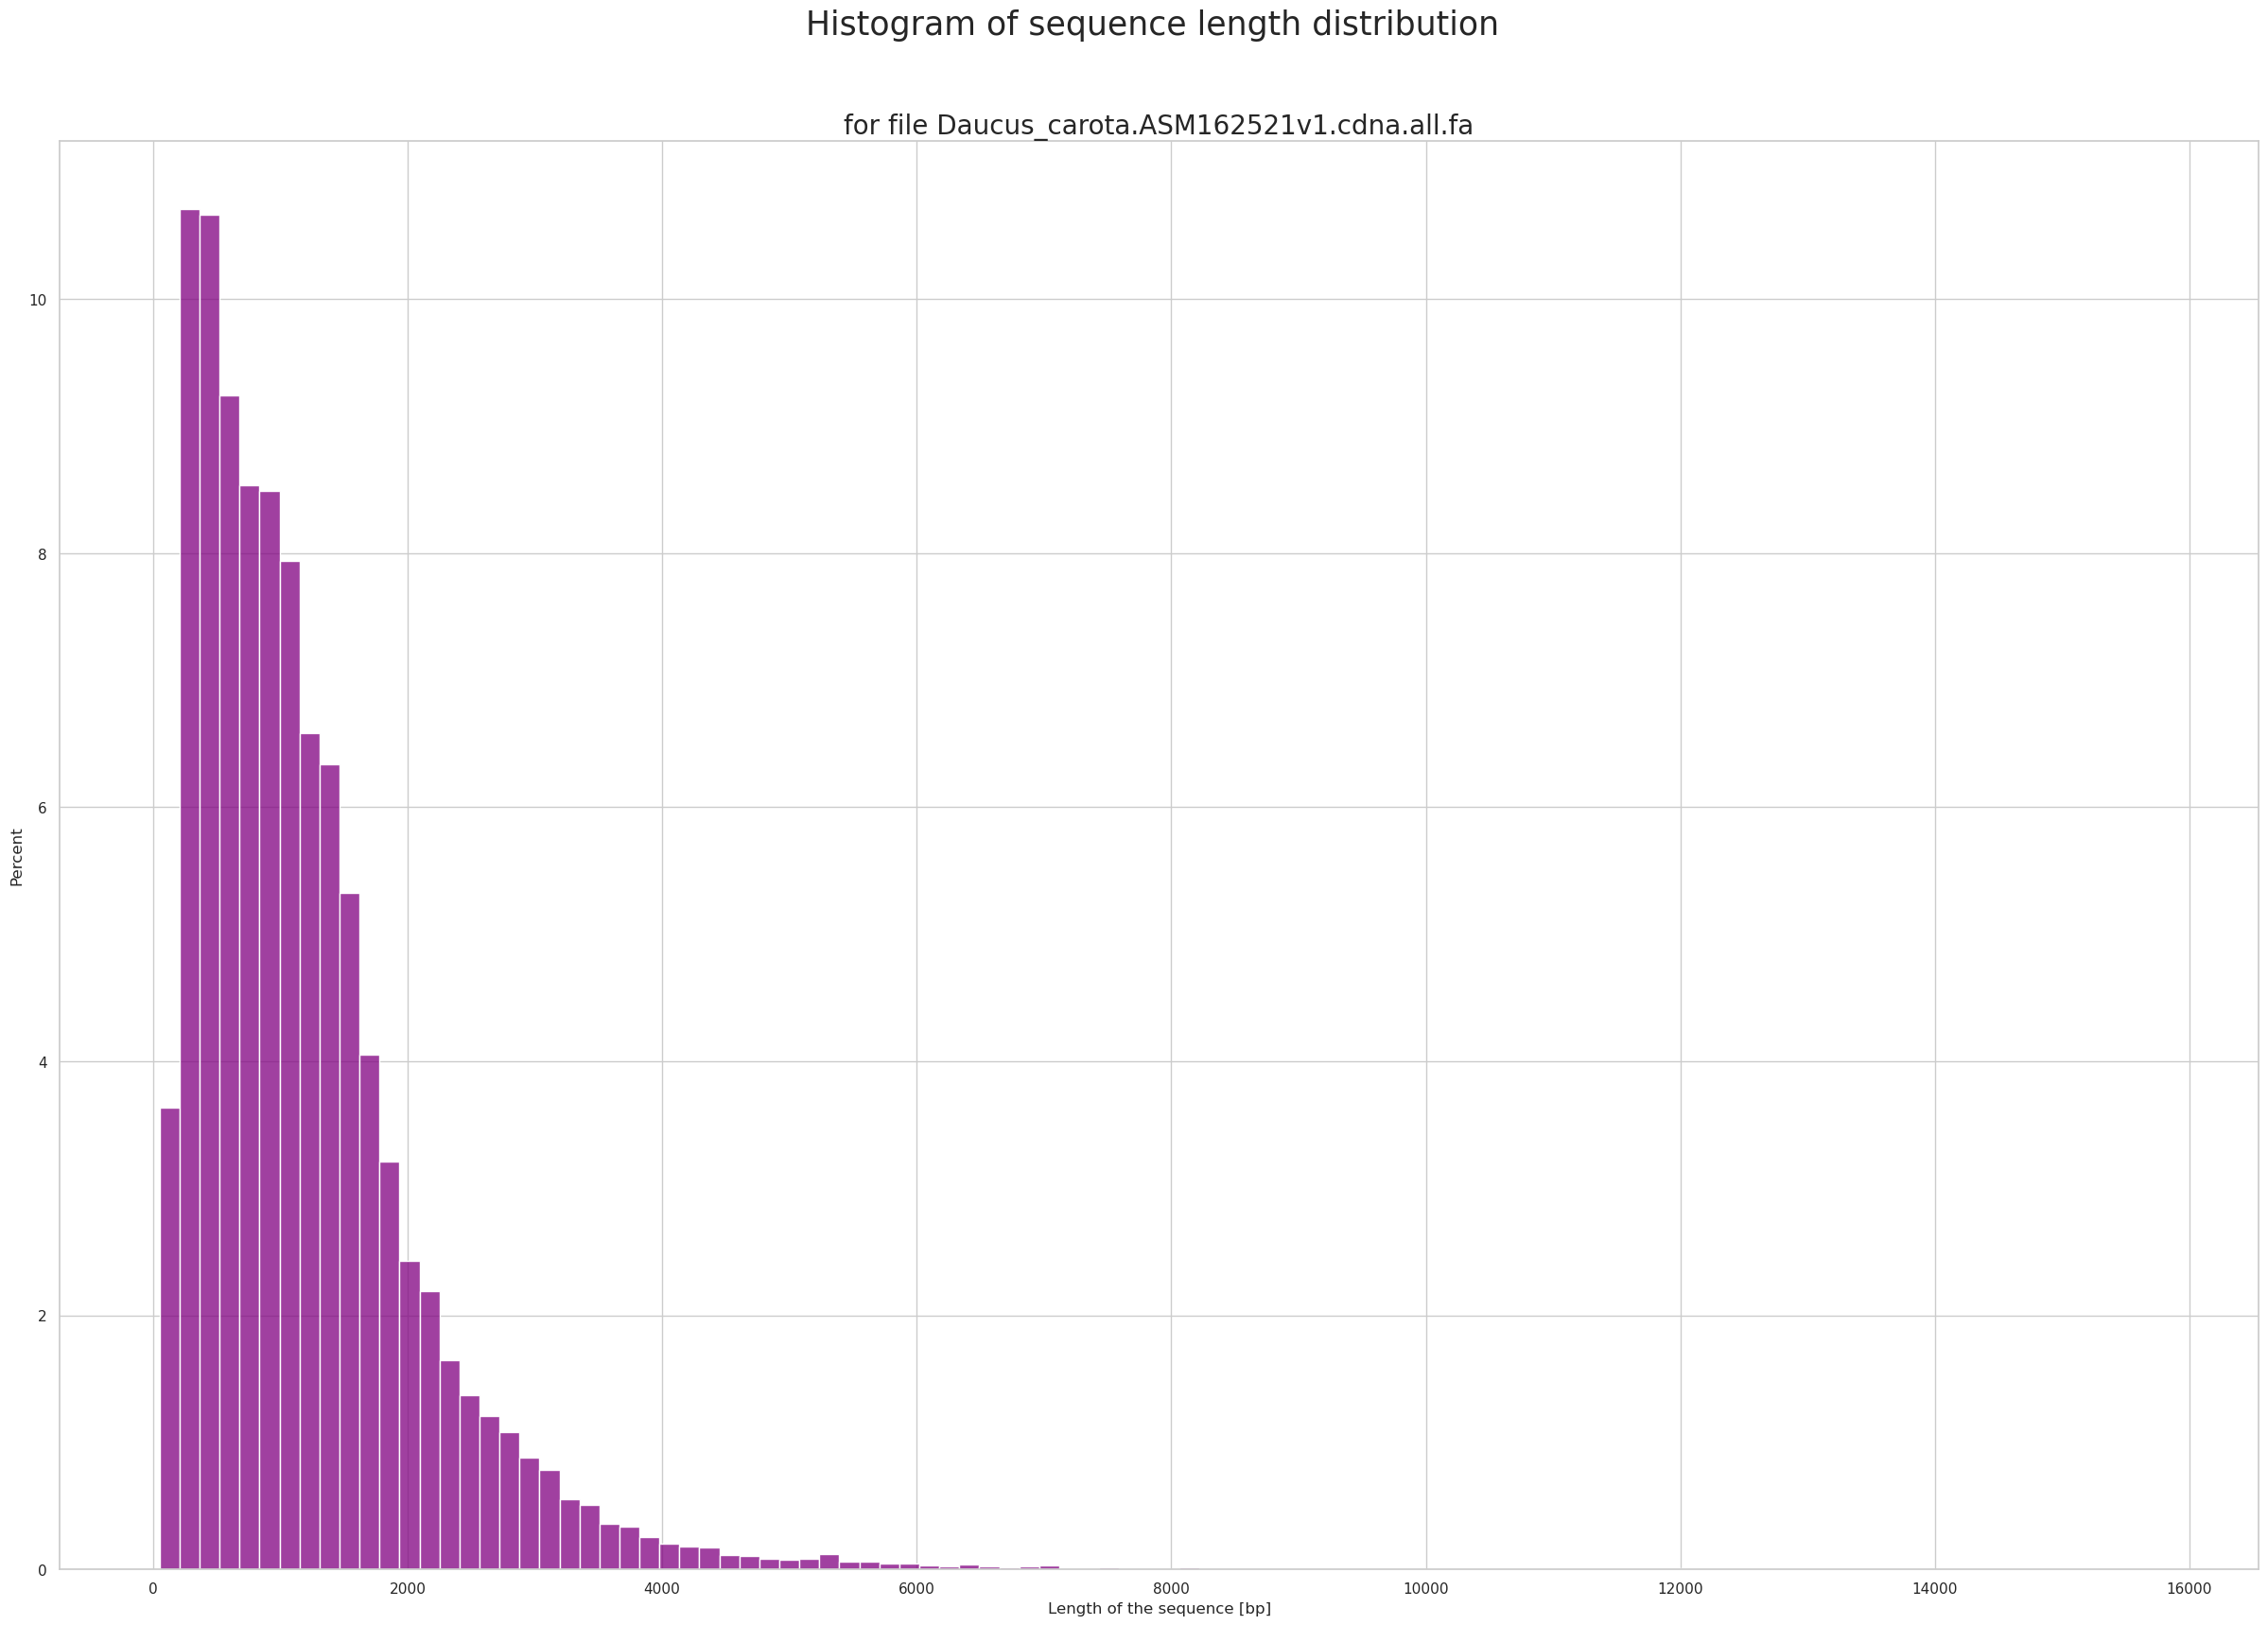

(51, 15759)
43.96
0.0


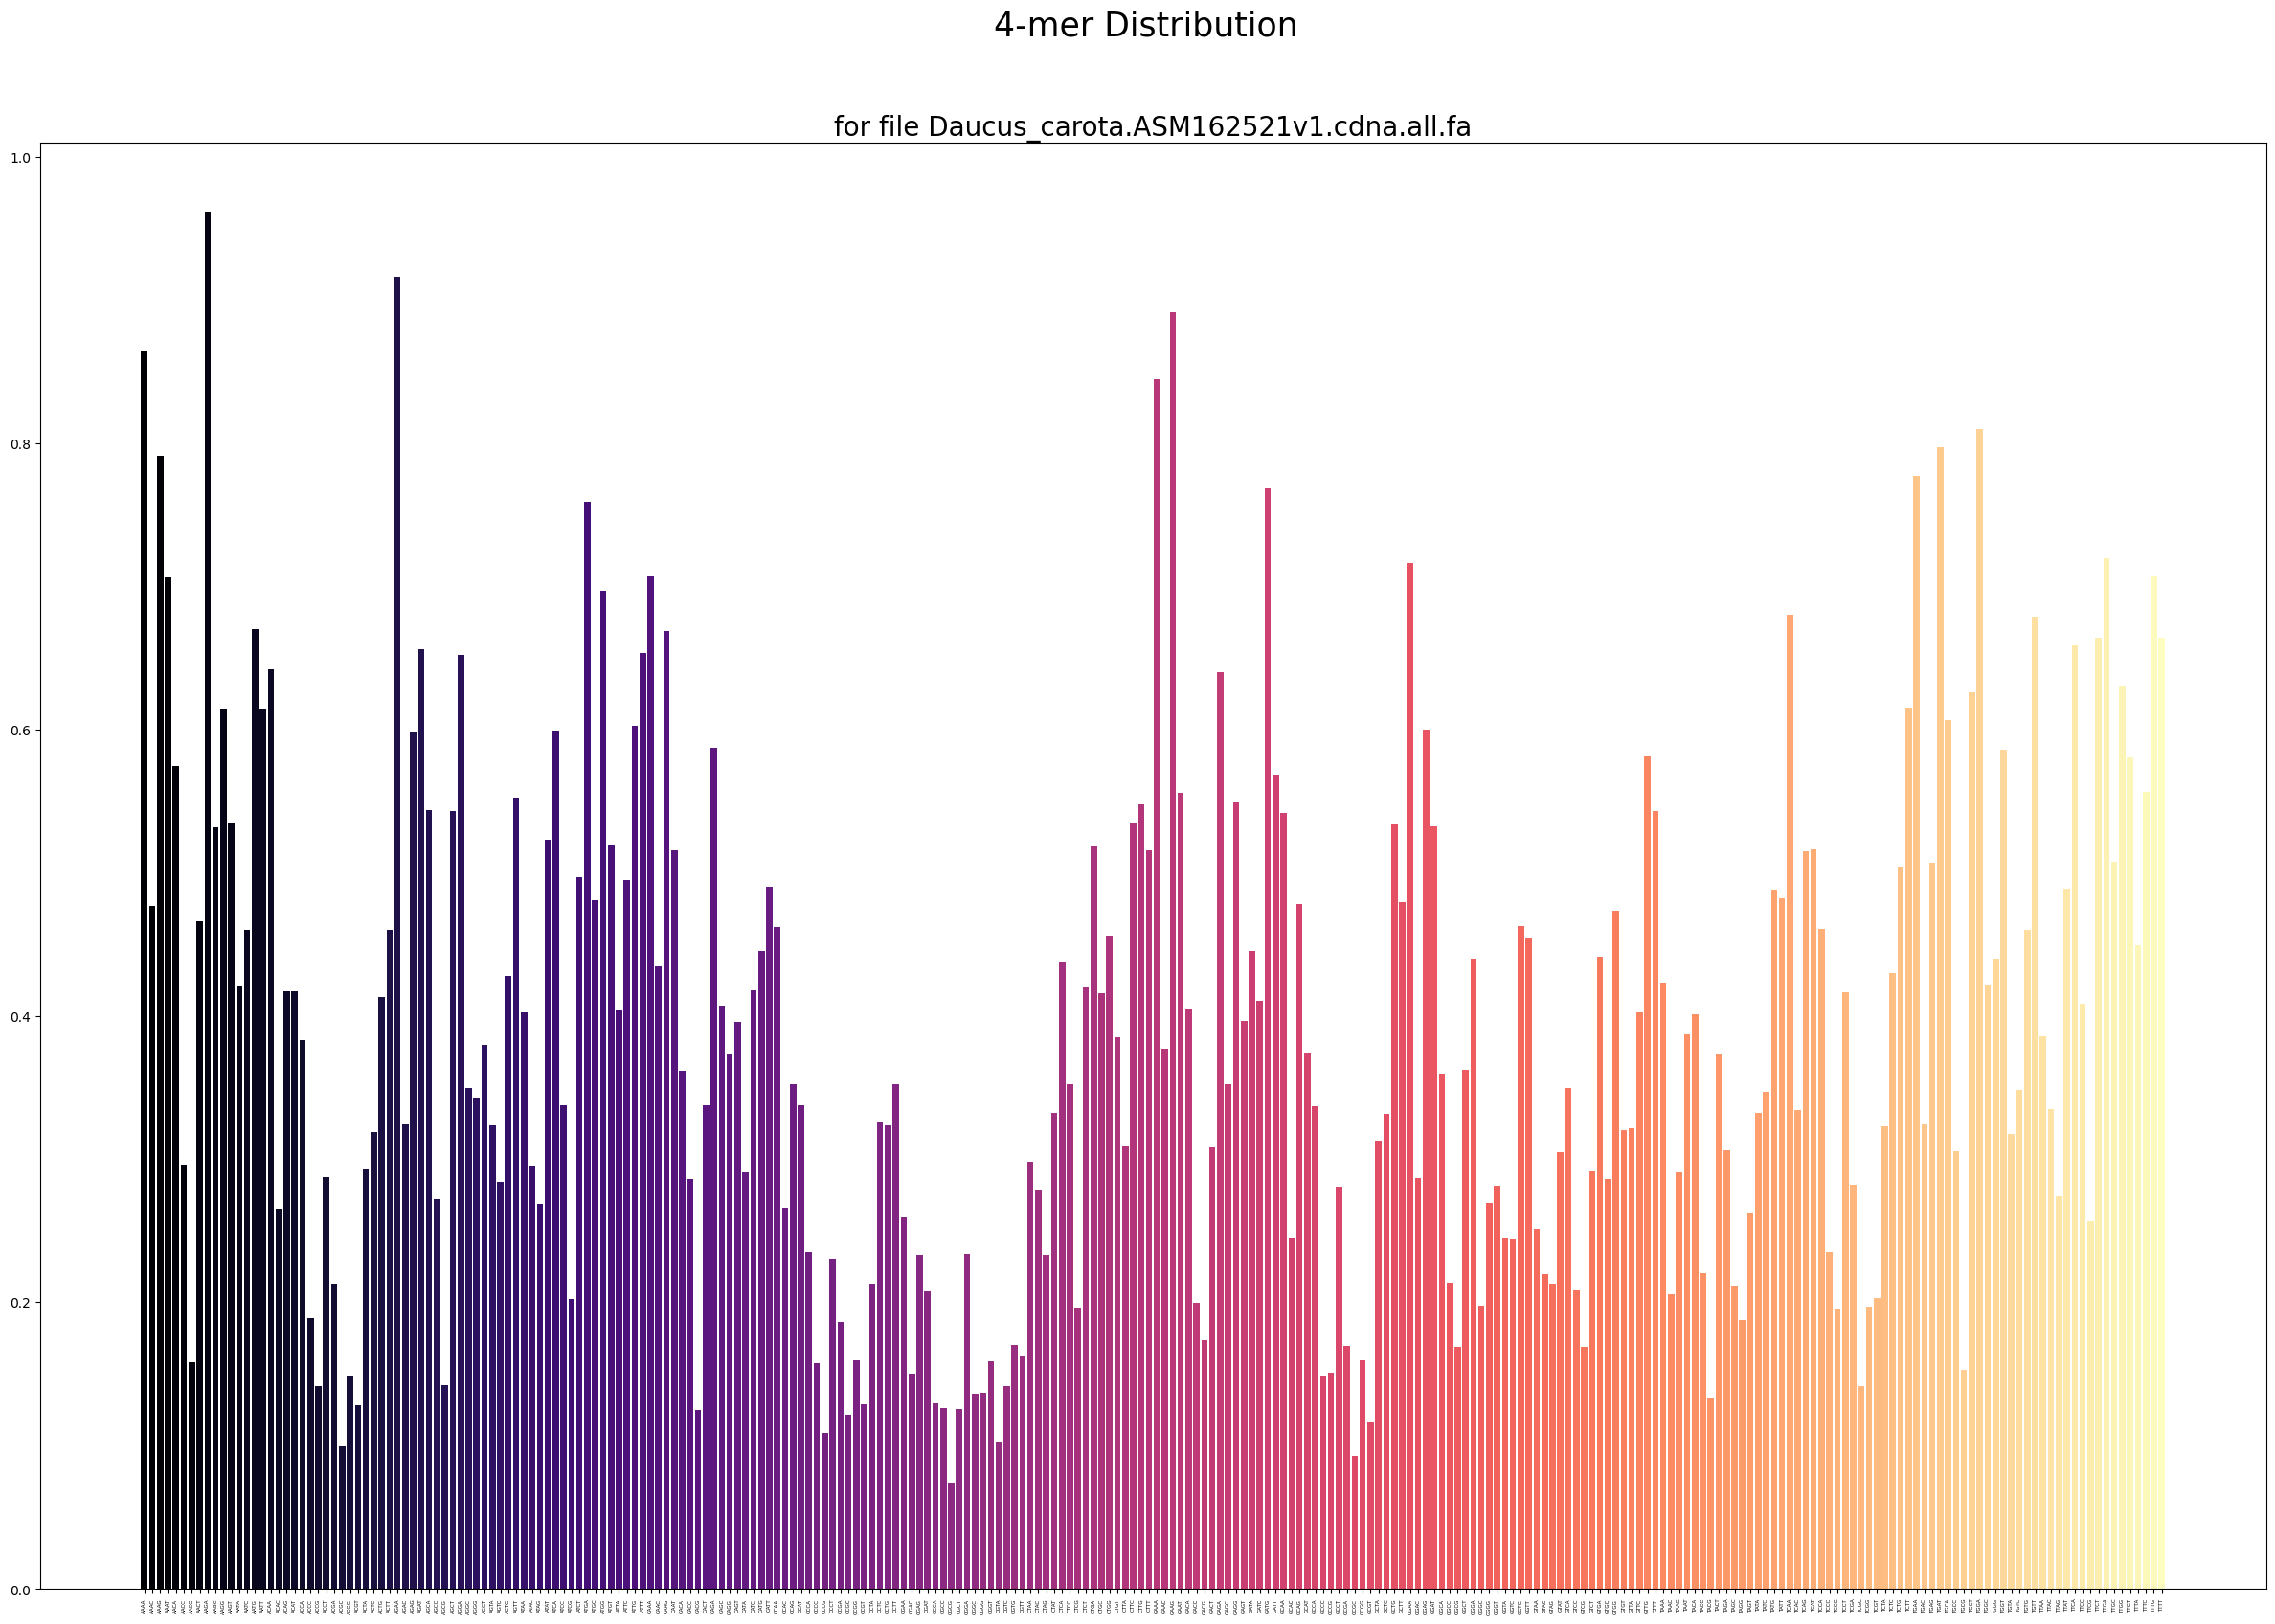

In [10]:
fa = FASTAStats("./example_data/Daucus_carota.ASM162521v1.cdna.all.fa", save_files=True)
print(fa)
print(fa.check_type())
print(fa.count_seq())
fa.hist_len_distribution(stat="percent")
print(fa.min_max_seq_len())
print(fa.gc_calc())
print(fa.n_calc())
fa.count_kmers()

In [11]:
dm6 = FASTAStats("./example_data/dm6.rRNA.fa", output_dir="./example_data")
print(dm6.check_type())
dm6.statistics()


DNA


('DNA', 91, 13, 3970, 40.72, 0.0)

In [13]:
peptides = FASTAStats('./example_data/peptides.fa', output_dir="./example_data")
print(peptides.check_type())

protein
